# K-Nearest Neighbours

1. In this supervised machine learning algorithim, we try to find the nearest neighbour of data point which is called K.
2. Then on the basis of mean median and mode we classify the data.
### Advantage of K-Nearset Neighbour are 
1. Less training phase
2. Simple
3. Versatile
#### Distances to find which point is Nearest
1. Eucledian
2. Mahattan 
3. Minkoski
4. Hamiestes

### Disadvantage of K-Nearset Neighbour are
1. computationally expensive
2. sensitive to imbalance of data 
3. sensitive to irrelvant features

#### where do  we use k-nearset neighbour
1. Recomendation system (for example ad system banking loan , finicial services, healthcare system)
2. ad system or video recomendatio based on the last search you have did how much different from category
3. banking (fruad detection, )
4. finicial system (loan services and other things )
5. healthcare system (fever will differen tthen other diases)
6. regression analysis (mean and median)
7. Classification (mode)
### How we can find neighbours
Man is know by the company he keeps\
so data pint is know by the company he keeps.

## Distances 
### Euclidan / pythogorean distance
1. This distance is based on pythagoras therom.(hyptemus square is equal to the square of base and prependicular)\
d(p,q)=underroot,sigmoid(x1-y1)**2
### Manhattan Distance
in this we  take modlus to make distance points from negative to postive(d(p,q)=sigmoid|x1-x2||y1-y2|).equation 
### Minkowski Distance
d(p,q)=sigmoid|xi-yi|1/p
### hamning Distance
strings(Distance)

# K-Nearset Neighbour (KNN)
KNN is a supervised machine learning algorithim that can be used to slove both regression and classification problems.\
It is a non parametric, lazy learning algorithim.NOn parametric means it does'not take any underlying assumptions on the distribution of data.Lazy learning mean it does not require any training data points for model generation. All training data is used in testing phase. This means training phase is faster but testing phase is slower and costly.\
KNN algorithim just store data in the traning phase, when it gets the new data then it classifies that data into a category that is much similar to new data.

In [2]:
# import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# load the dataset 
df=sns.load_dataset('iris')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# split the data into x,y
x=df.drop('species', axis=1)
y=df['species']

In [14]:
# call the model and fit on the data 
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=1)
# fit the model here 
model.fit(x,y)
new_measurement=np.array([[5.1,2.1,4.5,2.3]])
# let's predict with our model
model.predict(new_measurement)

c:\Users\Basit\miniconda3\envs\python_ml\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['virginica'], dtype=object)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

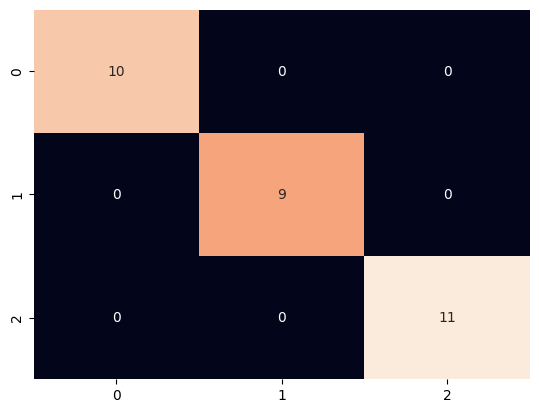

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# fit the model 
model.fit(x_train,y_train)
# predict the species using test data 
y_pred=model.predict(x_test)
# Evlauate the model
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
# plot the confusion_,matrix 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True ,cmap=None,cbar=False)

# Regression using KNN

In [3]:
import plotly.express as px
df=px.data.tips()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
x=df.drop(['tip'],axis=1)
y=df['tip']

In [6]:
# let's eoncode out categorical data into numeric one 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in x.columns:
    if x[col].dtype=='object'or x[col].dtype=='category':
        x[col]=  le.fit_transform(x[col])


In [10]:
# let's call the model.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
# let's call the model
model=KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=2)
# let's split the data train and testing data
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# let's fit model on data
model.fit(x_train, y_train)
# take prediction from model
y_pred=model.predict(x_test)
# evaluate the model
print(f'R2_score:',r2_score(y_pred, y_test))
print(f'MSE:',mean_squared_error(y_pred,y_test))
print(f"RMSE:",(np.sqrt(mean_squared_error(y_pred,y_test))))

R2_score: 0.010444414069260888
MSE: 0.8382265306122448
RMSE: 0.9155471209130881


In [11]:
x_test.head()

,total_bill,sex,smoker,day,time,size
24,19.82,1,0,1,0,2
6,8.77,1,0,2,0,2
153,24.55,1,0,2,0,4
211,25.89,1,1,1,0,4
198,13.00,0,1,3,1,2


In [ ]:
# predict the specific values
model.predict([[5,1,1,0,0,5]])